In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from scipy.io import mmread
import matplotlib.pyplot as plt

In [3]:
sample_info = pd.read_csv('Cell_embeddings.xls', index_col=0, sep='\t')
sample_info.head()

,Ident,DNA_Cluster,DNA_Dim1,DNA_Dim2,RNA_Cluster,RNA_Dim1,RNA_Dim2
ID,,,,,,,
02:03:10:06,Mix,0.0,3.007822,23.488186,NaN,NaN,NaN
02:03:68:06,Mix,1.0,-5.865982,-16.645292,0.0,10.649496,10.782198
02:04:28:07,Mix,1.0,16.244377,-10.819464,0.0,2.390981,12.862354
02:06:68:02,HepG2,0.0,-24.125530,-5.591871,0.0,0.396487,10.054891
02:06:82:08,Mix,1.0,-7.054980,1.192711,1.0,4.515073,-24.443957


In [4]:
sample_info.Ident.value_counts()

Mix       1807
HEK293     862
HepG2      690
Name: Ident, dtype: int64

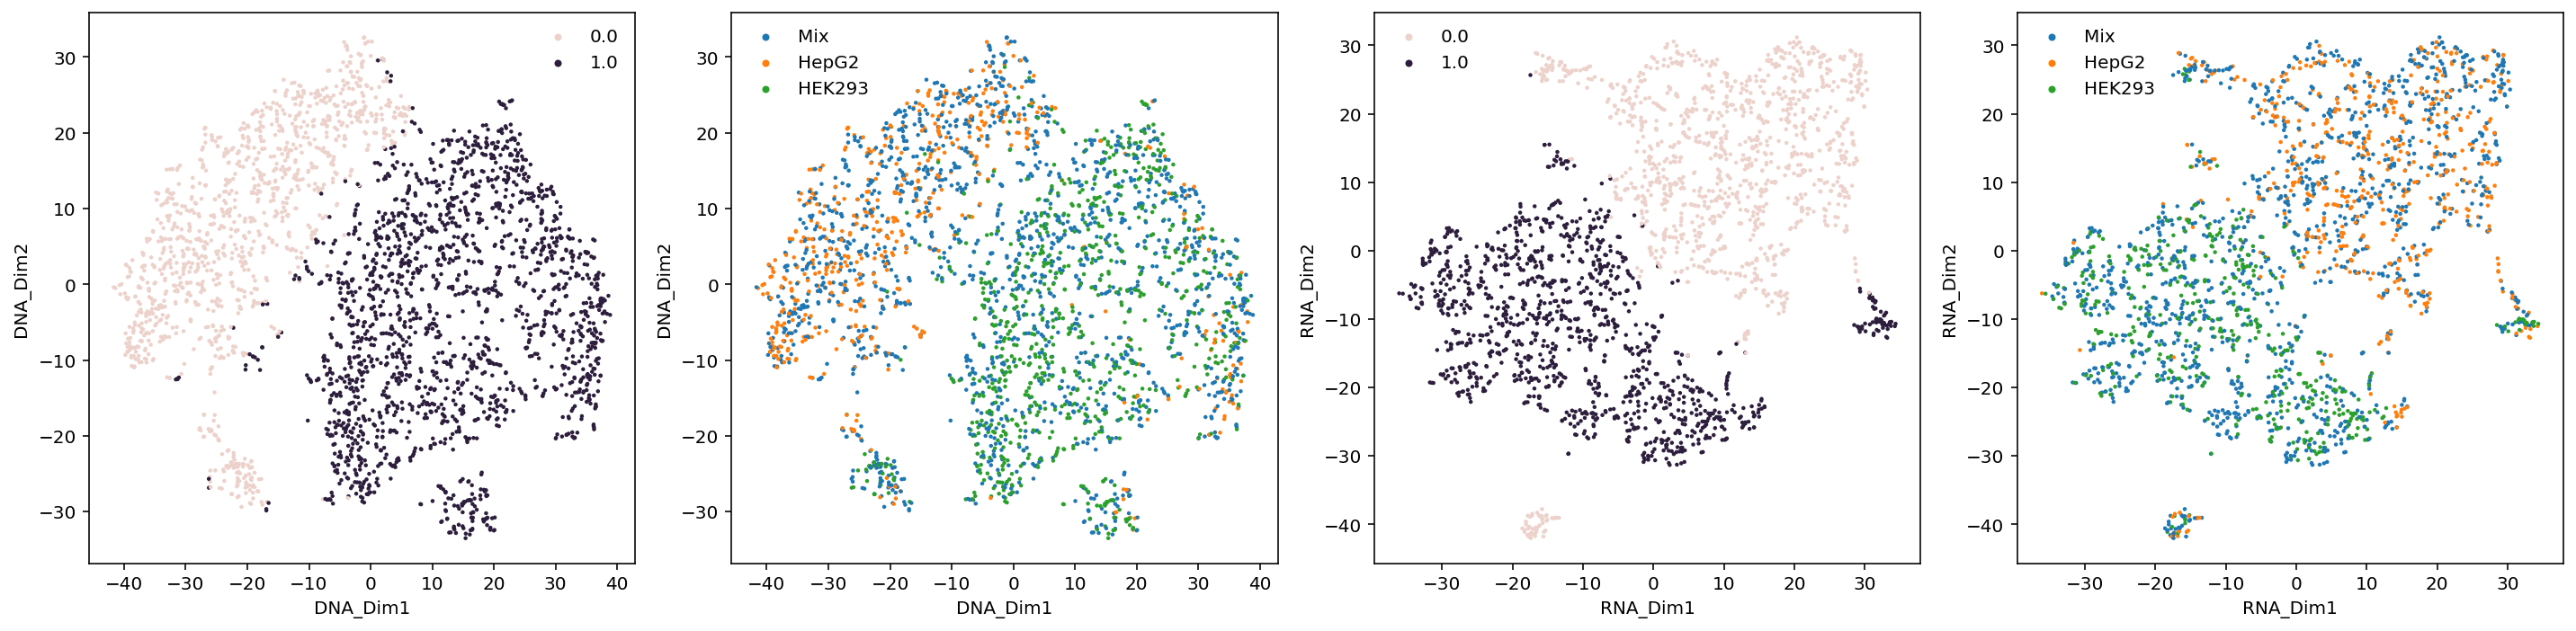

In [5]:
fig, ax = plt.subplots(figsize=(20,5), ncols=4)

for i,j,k in zip([0,1,2,3], ['DNA_Cluster', 'Ident', 'RNA_Cluster', 'Ident'], ['DNA_Dim', 'DNA_Dim', 'RNA_Dim', 'RNA_Dim']):
    sns.scatterplot(data = sample_info, x = k + '1', y = k + '2', hue = j, ax=ax[i], ec=None, s=5)
    ax[i].legend(frameon=False, markerscale=0.5)
fig.tight_layout()
plt.show()

In [8]:
!head Cell_Mix_RNA_filtered/features.tsv

hg19_ENSG00000000003	TSPAN6
hg19_ENSG00000000005	TNMD
hg19_ENSG00000000419	DPM1
hg19_ENSG00000000457	SCYL3
hg19_ENSG00000000460	C1orf112
hg19_ENSG00000000938	FGR
hg19_ENSG00000000971	CFH
hg19_ENSG00000001036	FUCA2
hg19_ENSG00000001084	GCLC
hg19_ENSG00000001167	NFYA


In [9]:
dna_mtx = mmread('Cell_Mix_DNA_filtered/matrix.mtx')
rna_mtx = mmread('Cell_Mix_RNA_filtered/matrix.mtx')

dna_filtered_cells = [i.strip() for i in open('Cell_Mix_DNA_filtered/barcodes.tsv')]
dna_features = [i.strip().split('\t')[0] for i in open('Cell_Mix_DNA_filtered/features.tsv')]

rna_filtered_cells = [i.strip() for i in open('Cell_Mix_RNA_filtered/barcodes.tsv')]
rna_features = [i.strip().split('\t')[0] for i in open('Cell_Mix_RNA_filtered/features.tsv')]

In [10]:
dna_count = pd.DataFrame(data=dna_mtx.toarray(), columns=dna_filtered_cells, index=dna_features)
rna_count = pd.DataFrame(data=rna_mtx.toarray(), columns=rna_filtered_cells, index=rna_features)

In [11]:
hek_filtered_dna_cells = set(sample_info.query('DNA_Cluster > 0.5').index) & set(dna_count.columns)
hek_filtered_rna_cells = set(sample_info.query('DNA_Cluster > 0.5').index) & set(rna_count.columns)

In [12]:
print(len(hek_filtered_dna_cells), len(hek_filtered_rna_cells))

1357 1283


In [13]:
hek_dna_count = dna_count.loc[:, hek_filtered_dna_cells]
hek_rna_count = rna_count.loc[:, hek_filtered_rna_cells]

In [15]:
!mkdir -p HEK293T/ATAC/filtered HEK293T/RNA/filtered

In [16]:
for i,j in zip(['HEK293T/RNA/filtered', 'HEK293T/ATAC/filtered'],
               [hek_rna_count, hek_dna_count]):
    out = pd.concat([j.sum(0), (j > 0).sum(0)], axis=1)
    out.columns = ['nCounts', 'nFeatures']
    out.to_csv('%s/metrics.csv' % i, index_label='cell')

In [17]:
for df in [hek_dna_count, hek_rna_count]:
    print(df.sum(0).median(), (df > 0).sum(0).median())

1083.0 936.0
575.0 437.0
